# Workflow of preparation of Sequencing data and usage of PyGenomeTrack as a tool to visualize genome regions

This notebook contains a procedure to prepare the sequencing data and to create the region plots. 
The workflow describes the tools to convert the files into the formats: BED6, BED12, BAM, and BIGWIG. Additionally, we formed the helper functions to create .ini files from scratch.

The [PyGenomeTrack](https://github.com/deeptools/pyGenomeTracks) aims to produce high-quality genome browser tracks.

The main steps:
    0. Installation of requirements.
    1. Prepare your .gff3 files.
    2. Convert .gff3 into .bed6.
    3. Convert .gff3 into .bed12.
    4. Make .bigwig file from BAM/SAM format.
    5. Prepare the .ini files - from scrach or by edition of the example file.
    6. PyGenomeTracks - make tracks file.
    7. PyGenomeTracks - make region plot

__HINT: Exclamation mark (!) at the beginning of line allows to use bash commands from jupyter notebook__


### Requirements:
    Anaconda
    Python 2.7 or Python 3.x
    PyGenomeTrack
    samtools
    bedtools
    sortbed
    gff3togenepred
    genepredtobed
    numpy >= 1.8.0
    scipy >= 0.17.0
    py2bit >= 0.1.0
    pyBigWig >= 0.2.1
    pysam >= 0.8
    matplotlib >= 1.4.0
    deeptools


### Types of formats
* [GFF3](https://www.ensembl.org/info/website/upload/gff3.html) - General Feature Format Version 3
* [BED6/BED12](https://genome.ucsc.edu/FAQ/FAQformat.html#format1) - Browser Extensible Data
* The [BIGWIG](https://genome.ucsc.edu/goldenPath/help/bigWig.html) format is useful for dense, continuous data that will be displayed in the Genome Browser as a graph.
* The __INI__ file format is an informal standard for configuration files.
* [SAM](https://samtools.github.io/hts-specs/SAMv1.pdf) - Sequence Alignment Map
* [BAM](https://genome.ucsc.edu/goldenPath/help/bam.html) is the compressed binary version of the Sequence Alignment/Map (SAM) format, a compact and index-able representation of nucleotide sequence alignment.
* [genePred](http://genome.ucsc.edu/FAQ/FAQformat#format9) is a table format commonly used for gene prediction tracks in the Genome Browser.

## 0. Installation of requirenments

##### Installation of PyGenomeTrack

pyGenomeTracks works with python 2.7 and python 3.6. 

1. Install PyGenomeTrack with Anaconda:

        conda install -c bioconda pygenometracks 
    
2. Also, pyGenomeTracks can be installed using pip

        pip install pyGenomeTracks
    
3. If the latest version wants to be installed use:

        pip install  git+https://github.com/maxplanck-ie/pyGenomeTracks.git

In [1]:
# Installation of PyGenomeTrack with Anaconda
!conda install -c bioconda pygenometracks 

Solving environment: - ^C


In [ ]:
# Installation of gff3togenepred
!conda install ucsc-gff3togenepred

In [ ]:
# Update of gff3togenepred
!conda update ucsc-gff3togenepred

In [ ]:
# Inslallation of GenePredToBed
!conda install -c bioconda ucsc-genepredtobed

In [ ]:
# Installation of piBigWig
!pip install pyBigWig # with pip install

!conda install pybigwig -c bioconda # or with bioconda

## 1. Prepare your GFF3 and SAM/BAM files

Please look carefully at your GFF3 file. Delete unsufficient lines in your file.

## 2. Convert .gff3 into .bed6
    sortBed -i <gff3_file.gff3> | gff2bed > <bed_file.bed>

In [71]:
# Example
!sortBed -i newSP.gff3 | gff2bed > file_bed6.bed

In [82]:
# Sort Bed6:
!sort -k 1,1 -k2,2n file_bed6_sor1.bed > file_bed6_sorted.bed

In [46]:
# Sort Bed12:
!sort -k 1,1 -k2,2n file_bed12.bed > file_bed12_sorted.bed

## 3. Convert .gff3 into .bed12
    gff3ToGenePred infile.gff3 temp.genePre
    
__HINT:__ Possible error 'CDS feature must have phase'. 
Phase is a parameter in column 8 of gff3 (only for features CDS).
Add phases in the gff3 file according to the notes below.
You can just open your GFF3 file and add 0 in column 8 in the lines with CDS, eg. using Rgular Expressions
In case ot the another type of error, ex "Error: invalid genePred created: SPAC17G8.01c.1 I:2341250-2343947", look carefully at your gff3 and check if your exons are overlapping.


"Phase specifies how many nucleotides must be removed from the beginning of a CDS to reach a complete codon 
(0, 1 or 2). If phase is missing, the CDS cannot be translated without making dangerous assumptions about 
the data. Specifically, you have to assume that the first CDS has a phase of 0. For poorly assembled genomes, 
this may not by the case.
Even if the assumption always holds, a CDS without phase data can be hard to work with since you cannot 
translate an individual CDS without considering the other members of the model.
According to the GFF specification, phase information is required for CDS entries and is stored 
in the 8th column." (Source: https://support.bioconductor.org/p/101245/ available: 2019.04.03)


In [6]:
# Sort the GFF3 file by column 1 (chromosomes) and 4 (start positions) as:
!sort -k1,1 -k4,4n newSP_phase.gff3 > newSP_phase_sorted.gff3

In [25]:
# Creating the temporary file .genePred from gff3
!gff3ToGenePred newSP_phase_sorted.gff3 temp.genePred 

#"newSP_phase.gff3" is a gff3 file with phases in column 8.

'\n"Phase specifies how many nucleotides must be removed from the beginning of a CDS to reach a complete codon \n(0, 1 or 2). If phase is missing, the CDS cannot be translated without making dangerous assumptions about \nthe data. Specifically, you have to assume that the first CDS has a phase of 0. For poorly assembled genomes, \nthis may not by the case.\nEven if the assumption always holds, a CDS without phase data can be hard to work with since you cannot \ntranslate an individual CDS without considering the other members of the model.\nAccording to the GFF specification, phase information is required for CDS entries and is stored \nin the 8th column." (Source: https://support.bioconductor.org/p/101245/ available: 2019.04.03)\n'

In [42]:
# Creating BED file from temporary file
!genePredToBed temp.genePred file_bed12.bed

## 4. Make .bigwig file

##### Conversion of SAM format to BAM format (if your data are in SAM)
        samtools view -S <sam_file.sam> -b -o <bam_file.bam>

In [ ]:
#Convert SAM to BAM
!samtools view -S short_C1_1.sam -b -o short_C1_1.bam

##### Conversion of BAM format to BIGWIG using [bamCoverage from deeptools](https://deeptools.readthedocs.io/en/develop/content/tools/bamCoverage.html#Required%20arguments)

Requirenments:
- Python 2.7 or Python 3.x
- numpy >= 1.8.0
- scipy >= 0.17.0
- py2bit >= 0.1.0
- pyBigWig >= 0.2.1
- pysam >= 0.8
- matplotlib >= 1.4.0
- deeptools
- samtools

Steps:
    1. Sort BAM file
        samtools sort -n <bam_file.bam>
    2. Add index to bam file
        samtools index <bam_file.bam>
    3. Convert indexed bam to bigwig
        bamCoverage -b <bamfile.bam> -o <bibwigfile.bw>

##### Sort and add index to BAM file - it is a necessary step

In [28]:
# Sort the BAM file 
!samtools sort -n C1_1.bam

[W::bam_hdr_read] EOF marker is absent. The input is probably truncated
^C


In [29]:
# Add index to BAM file
!samtools index -b C1_1.bam

[W::bam_hdr_read] EOF marker is absent. The input is probably truncated
[E::hts_idx_push] Chromosome blocks not continuous
samtools index: failed to create index for "C1_1.bam"


##### Make BIGWIG from indexed BAM

In [ ]:
# Convert indexed bam to bigwig
!bamCoverage -b short_C1_1.bam -o bigwig.bw

##### Short look at the bigwig file

In [ ]:
import pyBigWig

bw = pyBigWig.open("bigwig.bw")
bw.header()

## 5. Preparation of the INI file
#### You can prepare your INI file from scratch (protocol below). However, we strongly recommend to use previously prepared INI files, and just edit them.

##### Preparation of INI file from scratch
...............................

## 6. PyGenomeTracks - make tracks file
Making tracks file is necessary to create the plot

__HINT:__ Make sure to take the right .bed, .bw, and .ini files.
If you change the name of BED file, you need to rewrite it in the .ini file.

In [95]:
# Making tracks file is necessary to create the plot
#
# HINT: Make sure to take the right .bed, .bw, and .ini files.
# If you change the name of BED file, you need to rewrite it in the .ini file. 

#PyGenomeTrack using BED6
!make_tracks_file --trackFiles file_bed6_sorted.bed bigwig_bed6.bw -o ini_file_BED6.ini

Adding bed file: file_bed6_sorted.bed
Adding bigwig file: bigwig_bed6.bw


In [89]:
#PyGenomeTrack using BED12
!make_tracks_file --trackFiles file_bed12_sorted.bed bigwig_bed6.bw -o ini_file_BED12.ini

Adding bed file: file_bed12_sorted.bed
Adding bigwig file: bigwig_bed6.bw


## 7. PyGenomeTracks - make region plot

##### Create region plot and save it as .png or .pdf
    !pyGenomeTracks --tracks <ini_file.ini> --region I:1,800,000-1,820,000 --outFileName <png_file.png>
    !pyGenomeTracks --tracks <ini_file.ini> --region I:1,800,000-1,820,000 --outFileName <pdf_file.pdf>

##### The example region plot using BED6 format:

If you want to have differebt colours for genes, UTRs etc., mark it in column 5 in bed6 file.

In [120]:
# Create the region plot
!pyGenomeTracks --tracks ini_file_BED6.ini --region I:108,000-115,000 --outFileName bed6_8.png
# !pyGenomeTracks --tracks ini_file_BED6.ini --region I:1,000,000-1,050,000 --outFileName bed6_1.pdf

INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:4.082379102706909
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 9.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
/home/lidka/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [file_bed6_sorted]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 1709.9999999999998,0
INFO:pygenometracks.tracksClass:plotting 4. [bigwig_bed6]


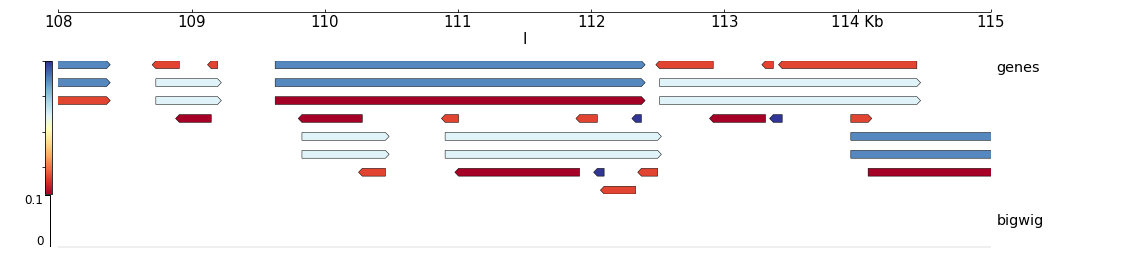

In [121]:
# Look at the new plot
from IPython.display import Image

#The name of the new file (.png) with plot showing genomic location
#
# Just copy the name of new .png file

png_file_name_bed6 = "bed6_8.png"
Image(png_file_name_bed6)

##### The example region plot using BED12 format:

In [122]:
# Create the region plot
!pyGenomeTracks --tracks ini_file_BED12.ini --region I:108,000-115,000 --outFileName bed12_8.png
# !pyGenomeTracks --tracks ini_file_BED12.ini --region I:1,000,000-1,050,000 --outFileName bed12_3.pdf

INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:1.5025415420532227
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 9.0. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
/home/lidka/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [file_bed12_sorted]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 330.0,0
INFO:pygenometracks.tracksClass:plotting 4. [bigwig_bed6]


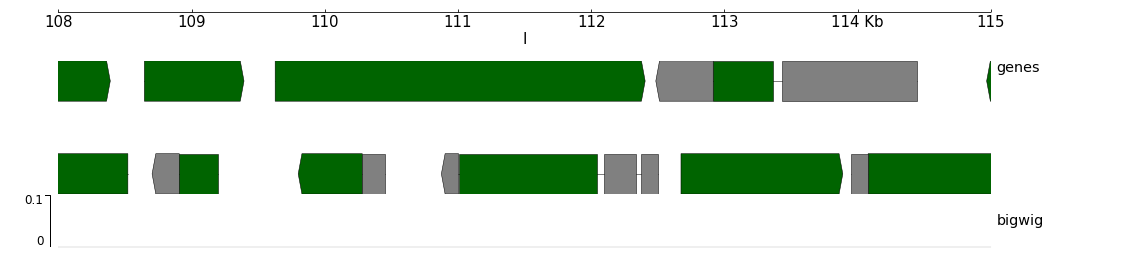

In [123]:
# Look at the new plot
from IPython.display import Image

#The name of the new file (.png) with plot showing genomic location
#
# Just copy the name of new .png file

png_file_name_bed12 = "bed12_8.png"
Image(png_file_name_bed12)